# How well do jobs and skills pay for Data Analysts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_us = df[df['job_country']=='United States'].dropna(subset='salary_year_avg').copy()

In [6]:
df_top_jobs = df_us['job_title_short'].value_counts().index[:6].tolist()

df_top_jobs

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [23]:
df_us_top6 = df_us[df_us['job_title_short'].isin(df_top_jobs)]
df_ordered = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


Text(0.5, 0, 'Yearly Salary($USD)')

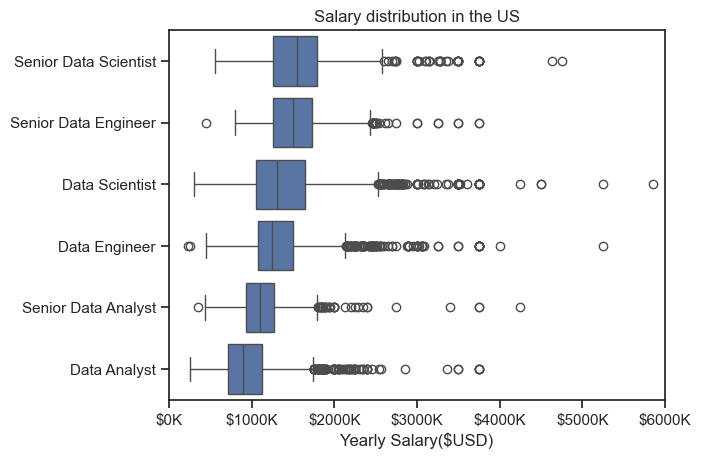

In [24]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=df_ordered)
sns.set_theme(style='ticks')
plt.ylabel('')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/100.0)}K'))
plt.title('Salary distribution in the US')
plt.xlim(0, 600000)
plt.xlabel('Yearly Salary($USD)')

# Investigate median salary VS skill for Data Analyst

In [45]:
df_DA_us = df[(df['job_title_short']=='Data Analyst')
              &(df['job_country']=='United States') ].copy()
df_DA_us = df_DA_us.dropna(subset='salary_year_avg')

In [47]:
df_DA_us = df_DA_us.explode('job_skills')
df_DA_us[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [51]:
df_DA_top_pay = (df_DA_us.groupby('job_skills')['salary_year_avg']
                .agg(['count', 'median']).sort_values('median', ascending=False))

df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay


,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [58]:
df_DA_skills = (df_DA_us.groupby('job_skills')['salary_year_avg']
                .agg(['count', 'median'])
                .sort_values('count', ascending=False))

df_DA_skills = df_DA_skills.head(10)
df_DA_skills = df_DA_skills.sort_values('median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


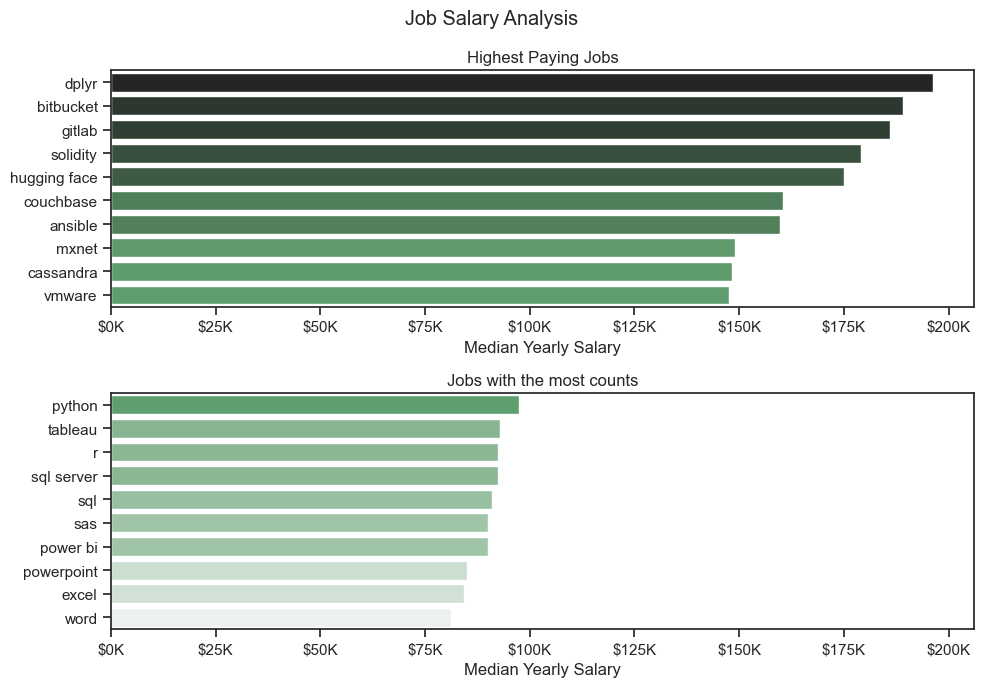

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay, x='median', y='job_skills', ax=axs[0], hue='median', palette='dark:g_r')
axs[0].legend().remove()
axs[0].set_title('Highest Paying Jobs')
axs[0].set_xlabel('Median Yearly Salary')
axs[0].set_ylabel('')
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y='job_skills', ax=axs[1],hue='median', palette='light:g')
axs[1].legend().remove()
axs[1].set_title('Jobs with the most counts')
axs[1].set_xlabel('Median Yearly Salary')
axs[1].set_ylabel('')
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
axs[1].set_xlim(axs[0].get_xlim())

plt.suptitle('Job Salary Analysis')
plt.tight_layout()